<Axes: >

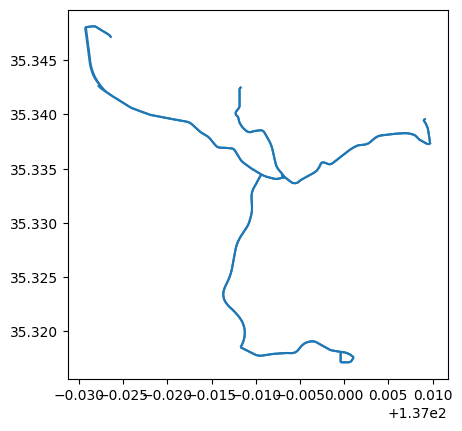

In [1]:
import osmnx as ox
import folium
import geopandas as gpd
from typing import List

# 峠道
graph = ox.graph_from_point(center_point=(35.334446, 136.990590)
                                , network_type='drive'
                                , dist=2000
                                , simplify=True
                                , custom_filter='["highway"~"tertiary|secondary|primary"]')

# グラフデータをGeoDataFrameに変換
gdf_nodes = ox.graph_to_gdfs(graph, nodes=True, edges=False)
gdf_edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

gdf_edges.plot()


# # 指定した緯度と経度に最も近いノードを取得
# def get_nearest_node_by_coordinates(graph, latitude, longitude):
#     nearest_node = ox.distance.nearest_nodes(
#         graph, longitude, latitude, return_dist=False
#     )
#     return nearest_node

# # 中央付近のノードを取得
# center_node = get_nearest_node_by_coordinates(graph, 35.334446, 136.990590)

# # gdf_edgesでindex[0]とindex[1]を指定してエッジを取得


# # ノードを含むエッジを取得
# edges = gdf_edges.loc[(gdf_edges.index.get_level_values(0) == center_node)]
# start_edge = edges.iloc[0]

# lines = []
# line = {'total_distance': start_edge.length, 'ref': start_edge.ref, 'connected_edges': [start_edge] }

# # lineの最大距離
# max_distance = 1000

# # 探索済のエッジが含まれているかチェック
# def is_include_connected_edges(lines, line, edge):
#     if(any(edge in line['connected_edges'] for line in lines)):
#         return True
#     if(any(d == edge for d in line['connected_edges'])):
#         return True
#     return False

# # 探索処理
# def search(lines, line):
#     # lineのconnected_edgesの最後のエッジを取得
#     line_last_edge: gpd.GeoSeries = line['connected_edges'][-1]
    
#     line_st_node = line_last_edge.name[0]
#     line_ed_node = line_last_edge.name[1]
    
#     # 終了ノードを含むエッジを取得。
#     edges = gdf_edges.loc[(gdf_edges.index.get_level_values(0) == line_ed_node)]
#     for index, edge in edges.iterrows():
#         if(line['total_distance'] > max_distance):
#             lines.append(line)
#             line = {'total_distance': edge.length, 'ref': edge.ref, 'connected_edges': [edge] }
#         # 逆探索を防ぐ
#         st_node = edge.name[0]
#         ed_node = edge.name[1]
#         # st_nodeとed_nodeがlinesのconnected_edgesに含まれていないかチェック
#         target_edge = gdf_edges.loc[(gdf_edges.index.get_level_values(0) == ed_node) & (gdf_edges.index.get_level_values(1) == st_node)].iloc[0]
#         if(is_include_connected_edges(lines, line, target_edge)):
#             print('kita')
#             continue
#     return lines, line

# search(lines, line)